In [7]:
import pandas as pd

# load locally stored dataset with song features
df = pd.read_csv(filepath_or_buffer='data.csv', sep=',', index_col=0)

/var/folders/x8/bv52m_c16jlg9mzb2wmzrjbh0000gn/T/ipykernel_7125/3125421235.py:4: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer='data.csv', sep=',', index_col=0)


In [8]:
df.isnull().sum()

id                        1
name                  13399
artist                25365
album               1262104
acousticness              1
danceability              1
energy                    1
instrumentalness          1
loudness                  1
speechiness               1
tempo                     1
valence                   1
release_year         231235
dtype: int64

In [9]:
df.drop(df.loc[df['id'].isnull()].index, inplace=True)

In [10]:
df.isnull().sum()

id                        0
name                  13398
artist                25364
album               1262103
acousticness              0
danceability              0
energy                    0
instrumentalness          0
loudness                  0
speechiness               0
tempo                     0
valence                   0
release_year         231234
dtype: int64

In [11]:
bins = range(int(df['release_year'].min()) // 10 * 10, int(df['release_year'].max()) // 10 * 10 + 20, 10)
df_years = pd.cut(df['release_year'], bins=bins, right=False)

df_bins = df_years.value_counts()
df_bins[df_bins != 0].sort_index(ascending=False)

release_year
[2020, 2030)    190242
[2010, 2020)    513380
[2000, 2010)    439286
[1990, 2000)      2081
[1980, 1990)      1090
[1970, 1980)       783
[1960, 1970)       132
[1950, 1960)         3
Name: count, dtype: int64

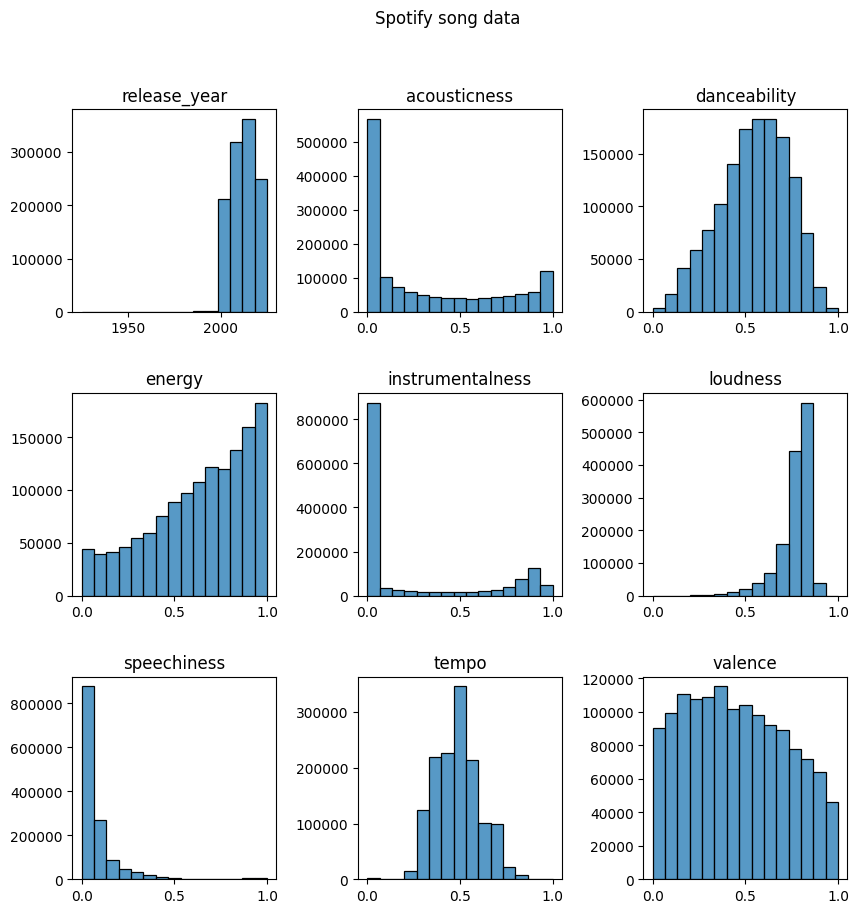

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

columns = [
    'release_year',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'loudness',
    'speechiness',
    'tempo',
    'valence',
]

x_ranges = [
    [1925, 2025],
    [0, 1],
    [0, 1],
    [0, 1],
    [0, 1],
    [],
    [0, 1],
    [],
    [0, 1],
]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, column in enumerate(columns):
    ax = axes[i // 3, i % 3]

    data = df[column]
    x_range = x_ranges[i]
    
    data_range = None
    if len(x_range) == 2:
        data_range = [x_range[0], x_range[1]]

    sns.histplot(data, bins=15, ax=ax, binrange=data_range)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle('Spotify song data')

plt.show()

In [14]:
df[columns].corr()

,release_year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
release_year,1.000000,-0.022878,0.036848,0.020417,0.018567,0.044561,0.031955,0.018799,-0.103847
acousticness,-0.022878,1.000000,-0.196875,-0.745344,0.104018,-0.615881,0.012864,-0.241925,-0.103498
danceability,0.036848,-0.196875,1.000000,0.146929,-0.182366,0.272140,0.111241,-0.003853,0.503164
energy,0.020417,-0.745344,0.146929,1.000000,-0.182001,0.776680,0.108460,0.263791,0.246847
instrumentalness,0.018567,0.104018,-0.182366,-0.182001,1.000000,-0.406702,-0.151562,-0.035425,-0.310559
loudness,0.044561,-0.615881,0.272140,0.776680,-0.406702,1.000000,0.030234,0.234935,0.290697
speechiness,0.031955,0.012864,0.111241,0.108460,-0.151562,0.030234,1.000000,-0.014192,0.047030
tempo,0.018799,-0.241925,-0.003853,0.263791,-0.035425,0.234935,-0.014192,1.000000,0.077314
valence,-0.103847,-0.103498,0.503164,0.246847,-0.310559,0.290697,0.047030,0.077314,1.000000


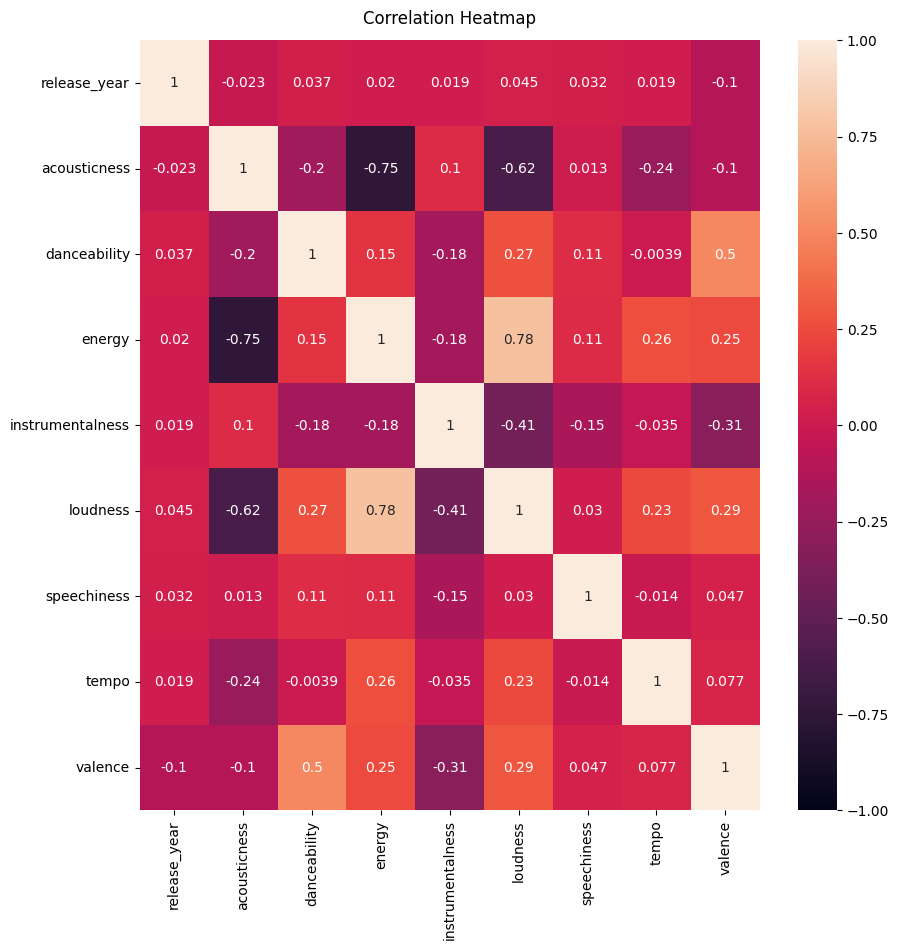

In [19]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df[columns].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);